# 1. Import Library

In [1]:
import tensorflow as tf 
import cv2
import matplotlib.pyplot as plt 
import numpy as np 
# import playsound
# from playsound import playsound
import winsound

# 2. Load Model Training

In [2]:
load_model = tf.keras.models.load_model("model/model.h5") #Load Model Training yang sudah dilatih

# 3. Testing Model Training

        Prediction Test

In [11]:
img_size = 224 #(untuk Mobilenet)
array_gambar = cv2.imread("data/tes/buka/s0012_04593_0_0_1_1_1_03.png", cv2.IMREAD_GRAYSCALE) #masukkan path tes file
backtorgb = cv2.cvtColor(array_gambar,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))
X_input = np.array(new_array).reshape(1,img_size, img_size, 3)

In [9]:
X_input.shape

(1, 224, 224, 3)

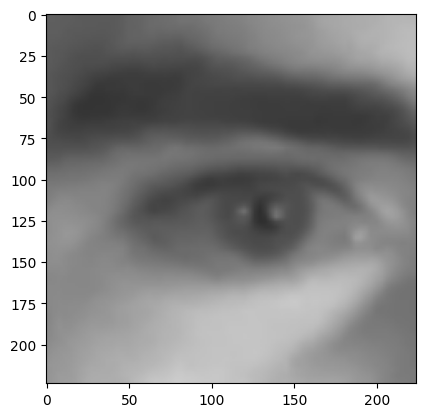

In [11]:
plt.imshow(new_array)

In [12]:
X_input=X_input/255.0 #wajib dijalankan

In [13]:
prediksi_tes = load_model.predict(X_input) #wajib dijalankan

1/1 [==============================] - 0s 478ms/step


In [14]:
prediksi_tes

array([[1.0000000e+00, 4.0670853e-17]], dtype=float32)

# 4. Live Detection (Webcam)

In [5]:
# Deteksi wajah dengan model openCV


#Cascade classifier = Classifier dari openCV yang sudah ditrainface_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Fitur Webcam
webcam = cv2.VideoCapture(0)
# webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
# webcam.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
ret, frame = webcam.read()
counter=0


while True:
    ret, frame = webcam.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    abu2 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    mata = eye_cascade.detectMultiScale(abu2, 1.1, 4)
    for x,y,w,h in mata:
        roi_abu2 = abu2[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255, 255, 255), 2)            
        mata2 = eye_cascade.detectMultiScale(roi_abu2)
        if len(mata2) == 0:
                print('Tidak terdeteksi')
        else:
            for (ex,ey,ew,eh) in mata2:
                mata_roi = roi_color[ey: ey+eh, ex:ex+ew]
        
    gambar_akhir = cv2.resize(mata_roi, (224,224))
    gambar_akhir = np.expand_dims(gambar_akhir, axis = 0)
    gambar_akhir = gambar_akhir / 255.0 #Normalisasi

    prediksi=load_model.predict(gambar_akhir)
    
# Integrasikan dengan Model

    if prediksi[0][0] > 0.5:
        status = 'Terbuka'
        counter=0
    elif prediksi[0][1] > 0.5:
        status = 'Tutup'
        counter += 1
        if counter >7:
            cv2.putText(frame, 'MENGANTUK!!', (50,122), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), cv2.LINE_4 )
            # playsound('alarm_tes.wav')
            winsound.Beep(500,500)
    

    abu2 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(face_cascade.empty())
    faces = face_cascade.detectMultiScale(abu2, 1.1, 4)

    # Tanda Kotak
    for (x,y,w,h) in faces:
        if status=='Terbuka':
            warna_font=(0,255,0)
        else:
            warna_font=(0,0,255)
        cv2.rectangle(frame, (x,y), (x+w, y+h), warna_font, 2)

    font = cv2.FONT_HERSHEY_SIMPLEX
    if status=='Terbuka':
        warna_font=(0,255,0)
    else:
        warna_font=(0,0,255)
    cv2.putText(frame, status, (50,50), font, 1.5,warna_font, cv2.LINE_4)
    cv2.imshow('Deteksi Mata Mengantuk PemLan', frame)


    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
webcam.release()
cv2.destroyAllWindows()
        


1/1 [==============================] - 0s 72ms/step
False
1/1 [==============================] - 0s 43ms/step
False
1/1 [==============================] - 0s 61ms/step
False
1/1 [==============================] - 0s 51ms/step
False
1/1 [==============================] - 0s 52ms/step
False
1/1 [==============================] - 0s 47ms/step
False
1/1 [==============================] - 0s 60ms/step
False
1/1 [==============================] - 0s 58ms/step
False
1/1 [==============================] - 0s 42ms/step
False
1/1 [==============================] - 0s 56ms/step
False
1/1 [==============================] - 0s 60ms/step
False
1/1 [==============================] - 0s 49ms/step
False
1/1 [==============================] - 0s 60ms/step
False
1/1 [==============================] - 0s 56ms/step
False
1/1 [==============================] - 0s 68ms/step
False
1/1 [==============================] - 0s 56ms/step
False


In [2]:
# playsound('alarm_tes.wav')


    Error 263 for command:
        close alarm_tes.wav
    The specified device is not open or is not recognized by MCI.
Failed to close the file: alarm_tes.wav


In [5]:
gambar_akhir.shape

(1, 224, 224, 3)